## task04：建模调参

## 1.学习目标
- 了解常用的机器学习模型，并掌握机器学习模型的建模与调参流程

## 2.代码与学习

### 2.1 导入数据

In [1]:
# 导入所需要的库
import numpy as np
import pandas as pd

In [2]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df


In [3]:
sample_feature = reduce_mem_usage(pd.read_csv('../input/ershouche2/data_for_tree.csv'))

Memory usage of dataframe is 62099672.00 MB
Memory usage after optimization is: 16520303.00 MB
Decreased by 73.4%


In [4]:
sample_feature

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,used_time,city,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,4384.0,1.0,10192.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,1,2.0,1,0.0,0.0,15.0,40.0,2262,-,0,...,4756.0,4.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN
2,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,4384.0,2.0,1458.0,45000.0,8496.0,100.0,14373814.0,5424.0,9848.0,16.0
3,3,0.0,10,0.0,1.0,15.0,109.0,71865,0.0,0,...,7124.0,NaN,13992.0,92900.0,5200.0,15.0,113034208.0,8248.0,8076.0,19.0
4,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,1531.0,6.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199032,199995,4.0,4,0.0,0.0,15.0,4.0,20903,0.0,0,...,7260.0,3.0,16576.0,99999.0,6000.0,12.0,138279072.0,8088.0,8344.0,11.0
199033,199996,0.0,0,0.0,0.0,15.0,0.0,708,0.0,0,...,6016.0,1.0,31424.0,68500.0,3200.0,13.0,173719696.0,6260.0,5528.0,7.0
199034,199997,0.0,1,1.0,1.0,15.0,49.0,6693,0.0,0,...,4344.0,3.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,22.0
199035,199998,0.0,1,0.0,1.0,15.0,27.0,96900,0.0,0,...,NaN,1.0,13656.0,84000.0,6400.0,15.0,124044600.0,8992.0,9080.0,NaN


### 2.2 提取所需要的特征

In [5]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

In [6]:
sample_feature = sample_feature.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continuous_feature_names + ['price']]

### 2.3 构建训练数据

In [7]:
train_X = train[continuous_feature_names]
train_y = train['price']

### 2.4 线性模型

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

In [9]:
# 查看训练的线性回归模型的截距（intercept）与权重(coef)
print('intercept:'+ str(model.intercept_))
print(sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True))

intercept:-110670.68277951103
[('v_6', 3367064.3416419374), ('v_8', 700675.5609399047), ('v_9', 170630.27723222607), ('v_7', 32322.661932037867), ('v_12', 20473.67079693188), ('v_3', 17868.07954148108), ('v_11', 11474.938996681996), ('v_13', 11261.764560009846), ('v_10', 2683.9200905949115), ('gearbox', 881.8225039249012), ('fuelType', 363.9042507216003), ('bodyType', 189.60271012072783), ('city', 44.949751205222555), ('power', 28.55390161675305), ('brand_price_median', 0.5103728134078517), ('brand_price_std', 0.45036347092631174), ('brand_amount', 0.14881120395065864), ('brand_price_max', 0.0031910186703135376), ('SaleID', 5.355989919859592e-05), ('train', 7.288996130228043e-06), ('offerType', 1.957057975232601e-06), ('seller', -3.7585850805044174e-06), ('brand_price_sum', -2.1750068681877114e-05), ('name', -0.0002980012713104996), ('used_time', -0.0025158943328818686), ('brand_price_average', -0.40490484510110836), ('brand_price_min', -2.246775348689321), ('power_bin', -34.4206441172

In [10]:
from matplotlib import pyplot as plt
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

The predicted price is obvious different from true price


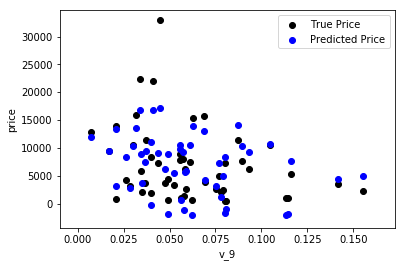

In [11]:
# 绘制特征v_9的值与标签的散点图，图片发现模型的预测结果（蓝色点）与真实标签（黑色点）的分布差异较大，且部分预测值出现了小于0的情况，说明我们的模型存在一些问题
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], model.predict(train_X.loc[subsample_index]), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

It is clear to see the price shows a typical exponential distribution


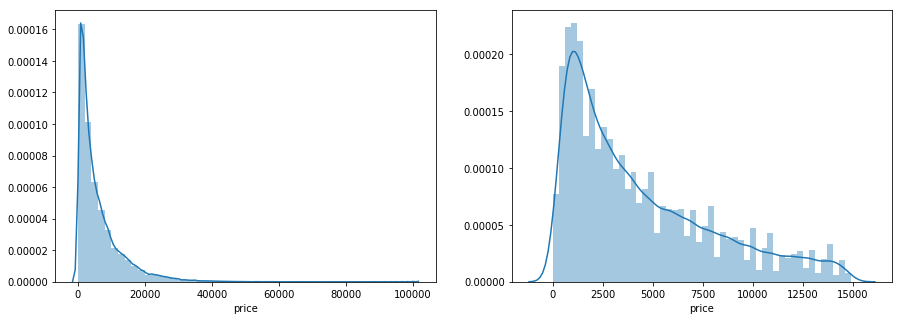

In [12]:
import seaborn as sns
print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y < np.quantile(train_y, 0.9)])

通过作图我们发现数据的标签（price）呈现长尾分布，不利于我们的建模预测。原因是很多模型都假设数据误差项符合正态分布，而长尾分布的数据违背了这一假设。

In [13]:
# 在这里我们对标签进行了log(x+1)变换，使标签贴近于正态分布
train_y_ln = np.log(train_y + 1)

The transformed price seems like normal distribution


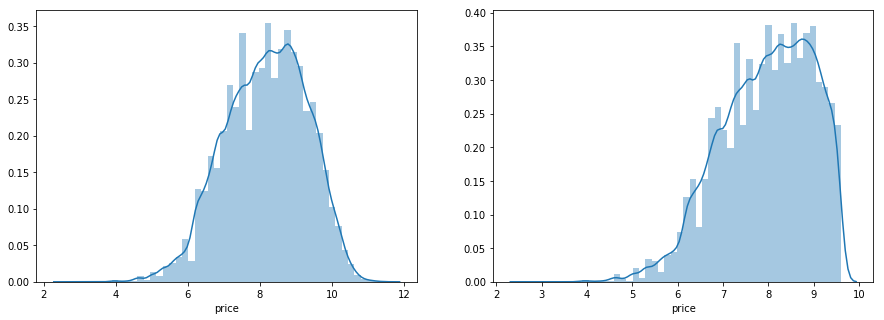

In [14]:
# 具体效果展示
import seaborn as sns
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln < np.quantile(train_y_ln, 0.9)])

In [15]:
model = model.fit(train_X, train_y_ln)
print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:18.75074946552785


[('v_9', 8.052409900567454),
 ('v_5', 5.764236596653446),
 ('v_12', 1.618208123681286),
 ('v_1', 1.479831058298728),
 ('v_11', 1.1669016563613137),
 ('v_13', 0.9404711296037418),
 ('v_7', 0.7137273083564362),
 ('v_3', 0.68378757710952),
 ('v_0', 0.008500518010110997),
 ('power_bin', 0.008497969302893517),
 ('gearbox', 0.007922377278329687),
 ('fuelType', 0.006684769706829313),
 ('bodyType', 0.0045235200927043),
 ('power', 0.0007161894205357367),
 ('brand_price_min', 3.334351114748939e-05),
 ('brand_amount', 2.897879704278056e-06),
 ('brand_price_median', 1.2571172873063057e-06),
 ('brand_price_std', 6.659176363483651e-07),
 ('brand_price_max', 6.19495630751657e-07),
 ('brand_price_average', 5.999345964992043e-07),
 ('SaleID', 2.1194170039648215e-08),
 ('seller', 4.657785268591397e-11),
 ('train', 4.4082071326556616e-11),
 ('offerType', -1.283160244724968e-10),
 ('brand_price_sum', -1.5126504215931197e-10),
 ('name', -7.015512588876883e-08),
 ('used_time', -4.122479372350265e-06),
 ('ci

The predicted price seems normal after np.log transforming


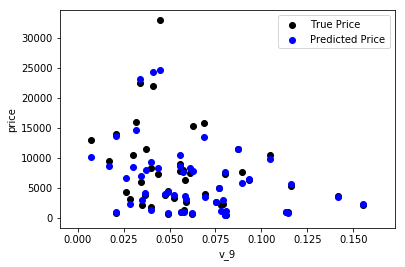

In [16]:
# 再次进行可视化，发现预测结果与真实值较为接近，且未出现异常状况
plt.scatter(train_X['v_9'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

### 2.5 五折交叉验证
在使用训练集对参数进行训练的时候，经常会发现人们通常会将一整个训练集分为三个部分（比如mnist手写训练集）。

一般分为：训练集（train_set），评估集（valid_set），测试集（test_set）这三个部分。

这其实是为了保证训练效果而特意设置的。其中测试集很好理解，其实就是完全不参与训练的数据，仅仅用来观测测试效果的数据。而训练集和评估集则牵涉到下面的知识了。

因为在实际的训练中，训练的结果对于训练集的拟合程度通常还是挺好的（初始条件敏感），但是对于训练集之外的数据的拟合程度通常就不那么令人满意了。

因此我们通常并不会把所有的数据集都拿来训练，而是分出一部分来（这一部分不参加训练）对训练集生成的参数进行测试，相对客观的判断这些参数对训练集之外的数据的符合程度。

这种思想就称为交叉验证（Cross Validation）

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,  make_scorer

In [18]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [19]:
# 使用线性回归模型，对未处理标签的特征数据进行五折交叉验证
scores = cross_val_score(model, X=train_X, y=train_y, verbose=1, cv = 5, scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from th

In [20]:
print('AVG:', np.mean(scores))

AVG: 1.3658023920313938


In [21]:
# 使用线性回归模型，对处理过标签的特征数据进行五折交叉验证
scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=1, cv = 5, scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [22]:
print('AVG:', np.mean(scores))

AVG: 0.1932530183704742


In [23]:
scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1, 6)]
scores.index = ['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.190792,0.193758,0.194132,0.191825,0.195758


### 2.6 模拟真实业务情况
但在事实上，由于我们并不具有预知未来的能力，五折交叉验证在某些与时间相关的数据集上反而反映了不真实的情况。

通过2018年的二手车价格预测2017年的二手车价格，这显然是不合理的，因此我们还可以采用时间顺序对数据集进行分隔。

在本例中，我们选用靠前时间的4/5样本当作训练集，靠后时间的1/5当作验证集，最终结果与五折交叉验证差距不大

In [24]:
import datetime

sample_feature = sample_feature.reset_index(drop=True)
split_point = len(sample_feature) // 5 * 4

train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()

train_X = train[continuous_feature_names]
train_y_ln = np.log(train['price'] + 1)
val_X = val[continuous_feature_names]
val_y_ln = np.log(val['price'] + 1)

In [25]:
model = model.fit(train_X, train_y_ln)

In [26]:
mean_absolute_error(val_y_ln, model.predict(val_X))

0.19577667270301005

### 2.7 绘制学习率曲线与验证曲线

In [27]:
from sklearn.model_selection import learning_curve, validation_curve

In [28]:
? learning_curve

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

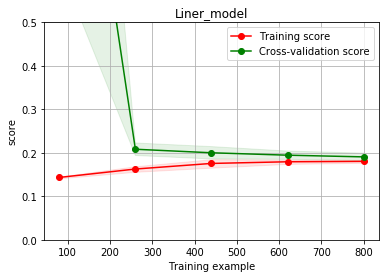

In [30]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

### 2.8 多种模型对比

In [31]:
train = sample_feature[continuous_feature_names + ['price']].dropna()
train_X = train[continuous_feature_names]
train_y = train['price']
train_y_ln = np.log(train_y + 1)

#### 线性模型 and 嵌入式特征选择
- 在过滤式和包裹式特征选择方法中，特征选择过程与学习器训练过程有明显的分别。
- 而嵌入式特征选择在学习器训练过程中自动地进行特征选择。
- 嵌入式选择最常用的是L1正则化与L2正则化。在对线性回归模型加入两种正则化方法后，他们分别变成了岭回归与Lasso回归。

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [33]:
models = [LinearRegression(),
          Ridge(),
          Lasso()]

In [34]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.4518e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.44971e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45061e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.4544e-21): result may not be accurate.
  overwrite_a=True).T
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45254e-21): result may not be accurate.
  overwrite_a=True).T


Ridge is finished
Lasso is finished


In [35]:
# 对三种方法的效果对比
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.190792,0.194832,0.383899
cv2,0.193758,0.197632,0.381893
cv3,0.194132,0.198123,0.384090
cv4,0.191825,0.195670,0.380526
cv5,0.195758,0.199676,0.383611


#### 非线性模型

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [37]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          MLPRegressor(solver='lbfgs', max_iter=100), 
          XGBRegressor(n_estimators = 100, objective='reg:squarederror'), 
          LGBMRegressor(n_estimators = 100)]

In [ ]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error))
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished


In [ ]:
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

可以看到随机森林模型在每一个fold中均取得了更好的效果

### 2.9 模型调参

In [ ]:
## LGB的参数集合：

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

- 贪心算法： 先找一个参数的最优值，其余参数都默认；找到后，在用这个最优的参数找下一个参数的最优值，依次进行下去
- 网格搜索： 已经了解
- 贝叶斯调参：详见下面的代码

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def rf_cv(num_leaves, max_depth, subsample, min_child_samples):
    val = cross_val_score(
        LGBMRegressor(objective = 'regression_l1',
            num_leaves=int(num_leaves),
            max_depth=int(max_depth),
            subsample = subsample,
            min_child_samples = int(min_child_samples)
        ),
        X=train_X, y=train_y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1 - val

In [ ]:
rf_bo = BayesianOptimization(
    rf_cv,
    {
    'num_leaves': (2, 100),
    'max_depth': (2, 100),
    'subsample': (0.1, 1),
    'min_child_samples' : (2, 100)
    }
)

In [ ]:
rf_bo.maximize()

In [ ]:
1 - rf_bo.max['target']